# Load Data

In [ ]:
import pandas as pd
df = pd.read_csv('SPAM.csv')

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
text_data = df.Message.copy()
target = df.Category.apply(lambda x: 1 if x=='spam' else 0)

In [ ]:
target.value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(text_data, target, 
                                                          stratify = target, random_state=1)

<font color='red'>Question:</font> What are in text_train, text_test, y_train, y_test?

In [ ]:
print(text_train)

2795    The affidavit says  &lt;#&gt;  E Twiggs St, di...
4161    i felt so...not any conveying reason.. Ese he....
4651    Finally it has happened..! Aftr decades..! BEE...
4018    Eek that's a lot of time especially since Amer...
4133    Hi baby ive just got back from work and i was ...
                              ...                        
4771    CHEERS LOU! YEAH WAS A GOODNITE SHAME U NEVA C...
1224       Rofl betta invest in some  anti aging products
1195                                        Ok... C ya...
1769    How. Its a little difficult but its a simple w...
3281    Badrith is only for chennai:)i will surely pic...
Name: Message, Length: 4179, dtype: object


In [ ]:
print(text_test)

1372    I though we shd go out n have some fun so bar ...
847     My stomach has been thru so much trauma I swea...
547     I know but you need to get hotel now. I just g...
3831    I agree. So i can stop thinkin about ipad. Can...
3200      No de.am seeing in online shop so that i asked.
                              ...                        
3714    If i not meeting ü all rite then i'll go home ...
4420    How have your little darlings been so far this...
3217    URGENT! We are trying to contact U. Todays dra...
630     Todays Vodafone numbers ending with 4882 are s...
3515    I always chat with you. In fact i need money c...
Name: Message, Length: 1393, dtype: object


In [ ]:
print(y_train)

2795    0
4161    0
4651    0
4018    0
4133    0
       ..
4771    0
1224    0
1195    0
1769    0
3281    0
Name: Category, Length: 4179, dtype: int64


In [ ]:
y_test

1372    0
847     0
547     0
3831    0
3200    0
       ..
3714    0
4420    0
3217    1
630     1
3515    0
Name: Category, Length: 1393, dtype: int64

In [104]:
text_train.shape

(4179,)

# Process Text Data

In [ ]:
## You might need to run the following two lines to download stopwords for NLTK
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<font color='red'>Question:</font> What are stopwords? Why do we need to remove them?

In [ ]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer(ignore_stopwords=False)

In [ ]:
stemmer.stem('dream')

'dream'

In [ ]:
stemmer.stem('dreaming')

'dream'

In [ ]:
stemmer.stem('dreamed')

'dream'

<font color='red'>Question:</font> What is stemming? Why is it helpful?

In [ ]:
import re
def stem_tokenizer(text):
    stemmer = EnglishStemmer(ignore_stopwords=True)
    words = re.sub(r"[^A-Za-z0-9\-]", " ", text).lower().split()
    #words = re.sub(r"[^A-Za-z0-9\-]", " ", text).split()
    words = [stemmer.stem(word) for word in words]
    return words 

In [ ]:
tokens=[]

import nltk
nltk.download('stopwords')
for i in range(len(df)):
  tokens.append(stem_tokenizer(df.Message[i]))

df['Stemmed_Tokens']=tokens
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message,Stemmed_Tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazi, avail, only,..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, earli, hor, u, c, alreadi, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, don, t, think, he, goe, to, usf, he, ..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tri, 2, c..."
5568,ham,Will ü b going to esplanade fr home?,"[will, b, go, to, esplanad, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[piti, was, in, mood, for, that, so, any, othe..."
5570,ham,The guy did some bitching but I acted like i'd...,"[the, guy, did, some, bitch, but, i, act, like..."


In [ ]:
corpora=['Will ü b going to esplanade fr home?','Rofl. Its true to its name']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# convert the documents into a matrix
wm = vectorizer.fit_transform(corpora)
#retrieve the terms found in the corpora
tokens = vectorizer.get_feature_names()
df_vect = pd.DataFrame(data = wm.toarray(),index = ['Doc1','Doc2'],columns = tokens)
df_vect


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,esplanade,fr,going,home,its,name,rofl,to,true,will
Doc1,1,1,1,1,0,0,0,1,0,1
Doc2,0,0,0,0,2,1,1,1,1,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
wm1= tfidf.fit_transform(corpora)

tokens1= tfidf.get_feature_names()
df_vect_1 = pd.DataFrame(data = wm1.toarray(),index = ['Doc1','Doc2'],columns = tokens1)
df_vect_1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,esplanade,fr,going,home,its,name,rofl,to,true,will
Doc1,0.42616,0.42616,0.42616,0.42616,0.000000,0.000000,0.000000,0.303216,0.000000,0.42616
Doc2,0.00000,0.00000,0.00000,0.00000,0.729993,0.364996,0.364996,0.259698,0.364996,0.00000


<font color='red'>Assignment:</font> Use **CountVectorizer** to transform text_train to **X_train**, and text_test to **X_test**. Hint: use stop_words = stopwords.words('english') and tokenizer = stem_tokenizer.

In [ ]:
for i in range(len(text_train)):
  print(text_train[i])
  break
   # X_train=vectorizer.fit_transform(text_train[i])
    # X_train_tokens= vectorizer.get_feature_names()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [ ]:
text_train_list = df.Stemmed_Tokens.tolist()
# print(text_train_list)

# for i in range(len(text_train)): 
#   wm = vectorizer.fit_transform(text_train)

vectorizer = CountVectorizer(stop_words = stopwords.words('english'))

idx=[]
for i in range(0,4179):
  idx.append(i)

X_train= vectorizer.fit_transform(text_train)
X_test=vectorizer.fit_transform(text_test)
# # print(vectorizer.transform(df.Stemmed_Tokens).toarray())
# # # Summarizing the Encoded Texts
# #print("Encoded Document is: ")
tokens_train=vectorizer.get_feature_names()
print(X_train.toarray())
print(X_test.toarray())

df_vect = pd.DataFrame(data = X_train.toarray(),index = idx )
df_vect


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,0,1,2,3,4,5,6,7,8,9,...,7229,7230,7231,7232,7233,7234,7235,7236,7237,7238
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape

(4179, 7239)

<font color='red'>Question:</font> How does **CountVectorizer** work? What is **Bag of Words**?

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 



A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

A vocabulary of known words.
A measure of the presence of known words.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

# Text Classifier

<font color='red'>Assignment:</font> build a random forest classification model to predict whether each text message is "spam" (target = 1) or "ham" (target = 0). Do this for both training data and test data. Print the accuracy, precision, recall, and F1 scores.

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rfc1=RandomForestClassifier()
rfc1=rfc1.fit(X_train,y_train)

rfc_test=rfc1.fit(X_test,y_test)

#predictions_train = rfc1.predict(text_train)
predictions_test = rfc_test.predict(X_test)

# print(classification_report(y_train,predictions_train))
print(classification_report(y_test,predictions_test))


print("Accuracy: ", accuracy_score(y_test, predictions_test))
predictions_test

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1206
           1       1.00      1.00      1.00       187

    accuracy                           1.00      1393
   macro avg       1.00      1.00      1.00      1393
weighted avg       1.00      1.00      1.00      1393

Accuracy:  1.0


array([0, 0, 0, ..., 1, 1, 0])

# TFIDF

<font color='red'>Assignment:</font> Instead of **CountVectorizer**, process text data using **TfidfVectorizer**. Then use random forest classifier to predict whether each text message is "spam" (target = 1) or "ham" (target = 0). Check how the model performs compared with previous results. Hint: besides the previous parameters, try max_df=0.5, min_df=5, ngram_range=(1, 3) in TfidfVectorizer. 

In [ ]:
 from sklearn.feature_extraction.text import TfidfVectorizer

 tfidf = TfidfVectorizer(stop_words='english')
 X_train_tfidf = tfidf.fit_transform(text_train)
 X_test_tfidf = tfidf.transform(text_test)

# #print(vectorizer.fit_transform(df.Stemmed_Tokens).toarray())
# # Summarizing the Encoded Texts
# #print("Encoded Document is: ")
 print(X_train_tfidf.toarray())
 print(X_test_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<font color='red'>Question:</font> What does TFIDF mean? Why is it useful?

TFIDF - means - 'Term Frequency - Inverse Document Frequency'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
wm1= tfidf.fit_transform(corpora)

tokens1= tfidf.get_feature_names()
df_vect_1 = pd.DataFrame(data = wm1.toarray(),index = ['Doc1','Doc2'],columns = tokens1)
df_vect_1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,esplanade,fr,going,home,its,name,rofl,to,true,will
Doc1,0.42616,0.42616,0.42616,0.42616,0.000000,0.000000,0.000000,0.303216,0.000000,0.42616
Doc2,0.00000,0.00000,0.00000,0.00000,0.729993,0.364996,0.364996,0.259698,0.364996,0.00000


# Topic Modeling

In [ ]:

X_train_tfidf.shape

(4179, 7112)

In [ ]:

X_test_tfidf.shape

(1393, 7112)

In [ ]:
len(tfidf.vocabulary_)

7112

<font color='red'>Question:</font> What is Latent Semantic Analysis (LSA)? What is the relationship between LSA and PCA?

Dimensionality reduction using truncated SVD (aka LSA).

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).

LSA and Singular Value Decomposition (SVD)
SVD tries to connect the correlation matrix of terms ( 𝑀⋅𝑀⊤ ) with the correlation matrix of documents ( 𝑀⊤⋅𝑀 ) through the singular matrix.

To see this connection, note that matrix  𝑇  contains the eigenvectors of the correlation matrix of terms. Likewise, the matrix  𝐷  contains the eigenvectors of the correlation matrix of documents. To see this, let’s compute

 Essentially LSA is PCA applied to text data. When using SVD for PCA, it's not applied to the covariance matrix but the feature-sample matrix directly, which is just the term-document matrix in LSA. The difference is PCA often requires feature-wise normalization for the data while LSA doesn't.

<font color='red'>Assignment:</font> create a pipeline using **MaxAbsScaler** and **TruncatedSVD** to transform X_train and X_test and reduce their dimensions to 100. Assign the transformed results to transformed_X_train and transformed_X_test.


In [ ]:
from sklearn.preprocessing  import MaxAbsScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

pipe= make_pipeline(MaxAbsScaler(),TruncatedSVD(n_components=100))
pipe

transformed_X_train =pipe.fit_transform(X_train)
transformed_X_test = pipe.fit_transform(X_test)

print(transformed_X_train)
print(transformed_X_test)


[[ 0.11081056 -0.07288709 -0.10925849 ...  0.17271696  0.05645757
   0.10098681]
 [ 0.02633251 -0.02584967 -0.05990575 ...  0.04802929 -0.01080289
   0.0067825 ]
 [ 0.03264242 -0.03170517 -0.05341541 ... -0.0661484  -0.05565461
  -0.03006578]
 ...
 [ 0.01063675 -0.00935129 -0.01863167 ... -0.00785992  0.04067648
  -0.02033148]
 [ 0.06729333 -0.05376156 -0.08174623 ...  0.0339097  -0.11256722
   0.02537639]
 [ 0.03421399 -0.03138009 -0.04172886 ... -0.03594558  0.05215378
   0.05882444]]
[[ 0.14770559 -0.16580953  0.04117768 ... -0.15539206 -0.05666198
   0.18071089]
 [ 0.07073    -0.08607091  0.03755496 ... -0.05123425  0.06021602
   0.08403093]
 [ 0.23669039 -0.22510931  0.02965491 ...  0.06712476 -0.14467198
  -0.03677722]
 ...
 [ 0.83846455  0.90240743 -0.15841356 ... -0.10679874 -0.20298916
   0.14854897]
 [ 0.25703079  0.2037342   0.03316302 ... -0.13117059  0.23207162
  -0.04123205]
 [ 0.08824429 -0.10258536  0.02753083 ... -0.0087589  -0.01131105
  -0.00197682]]


In [ ]:
svd=TruncatedSVD(n_components=100)
svd.fit(X_train)
svd.fit_transform(X_train)
print(svd.explained_variance_ratio_)

explained_variance=svd.explained_variance_ratio_


[0.03182675 0.01390001 0.0141987  0.01092822 0.0099104  0.00910482
 0.00740469 0.00700856 0.00627733 0.00608445 0.00590545 0.00583232
 0.00570799 0.00555627 0.00528446 0.00520894 0.00510017 0.00496413
 0.00490414 0.0048215  0.00469688 0.00458246 0.00441588 0.00425501
 0.00423591 0.00413639 0.00403063 0.00399757 0.00391884 0.00386354
 0.00382835 0.00376079 0.00361986 0.0035651  0.00352868 0.00352343
 0.00345732 0.00345455 0.00342349 0.0033486  0.00332469 0.00326193
 0.00322615 0.00316856 0.00314401 0.0031149  0.00307748 0.0030474
 0.00302663 0.00297048 0.00295366 0.00289765 0.0028953  0.00285258
 0.0028131  0.00277853 0.0027315  0.00270654 0.00268404 0.00264945
 0.00259951 0.00255035 0.00254041 0.00248819 0.00245929 0.00242669
 0.00241207 0.00239545 0.00236174 0.00233946 0.00232568 0.00228461
 0.00227305 0.00224701 0.00223914 0.00220326 0.00218026 0.00216607
 0.00214616 0.00212987 0.00211021 0.00210693 0.00209437 0.00206824
 0.00200989 0.00201001 0.00199835 0.00197736 0.00196329 0.00194

In [61]:
print(len(transformed_X_train))

print(len(transformed_X_test))

4179
1393


In [62]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=100)
X_lsa = lsa.fit_transform(X_train)
lsa.components_.shape

(100, 7239)

In [71]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_train)
lsa_scaled = TruncatedSVD(n_components=100)
X_lsa_scaled = lsa_scaled.fit_transform(X_scaled)
X_lsa_scaled.shape

(4179, 100)

#The dimensions are reduced to 100.

<font color='red'>Assignment: </font> visualize explained variance ratio vs. number of components. What does it tell you?

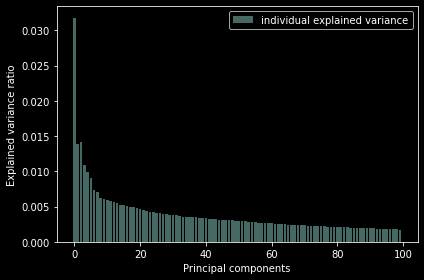

In [ ]:
import matplotlib.pyplot as plt
plt.plot

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(100),explained_variance, alpha=0.5,align='center', label='individual explained variance' )
    plt.xlabel('Principal components')
    plt.ylabel('Explained variance ratio')
    plt.legend()
    plt.tight_layout()


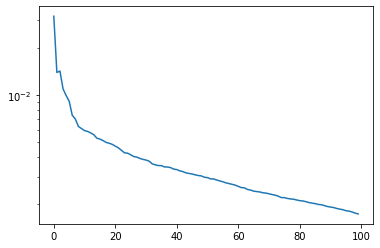

In [73]:
#Plot
plt.semilogy(lsa.explained_variance_ratio_)

<font color='red'>Assignment: </font> Train a **RandomForestClassifier** with transformed data of 100 dimensions, then use it to make predictions. Print the accuracy score and classification report.

In [122]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# rfc.fit_transform(X_train)
clf=RandomForestClassifier()
clf.fit(transformed_X_train,y_train)




RandomForestClassifier()

In [75]:
y_test_pred=clf.predict(transformed_X_test)
y_test_pred


array([0, 0, 1, ..., 1, 1, 0])

In [118]:
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Accuracy: ", accuracy_score(y_test,y_test_pred))

Accuracy:  1.0
Accuracy:  0.6870064608758076


In [ ]:
y_train_pred= clf.predict(transformed_X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.94      0.68      0.79      1206
           1       0.26      0.74      0.39       187

    accuracy                           0.69      1393
   macro avg       0.60      0.71      0.59      1393
weighted avg       0.85      0.69      0.74      1393



In [74]:
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       1.00      1.00      1.00       560

    accuracy                           1.00      4179
   macro avg       1.00      1.00      1.00      4179
weighted avg       1.00      1.00      1.00      4179



<font color='red'>Assignment: </font> train and predict using only the first 4 components. How does the result compare with above? Why?

In [76]:
from sklearn.preprocessing  import MaxAbsScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

#use number of components =4
pipe2= make_pipeline(MaxAbsScaler(),TruncatedSVD(n_components=4))
pipe2

transformed_X_train_2 =pipe2.fit_transform(X_train)
transformed_X_test_2 = pipe2.fit_transform(X_test)

print(transformed_X_train_2)
print(transformed_X_test_2)

[[ 0.11079634 -0.07313165 -0.10595483 -0.02811655]
 [ 0.02602334 -0.02571413 -0.06174926  0.0025701 ]
 [ 0.03266799 -0.03185357 -0.05350991 -0.00373106]
 ...
 [ 0.01061533 -0.00943985 -0.01848662  0.00107982]
 [ 0.0671627  -0.05353042 -0.08424736  0.00676616]
 [ 0.03415881 -0.03063773 -0.04235898 -0.02527591]]
[[ 0.14663965 -0.16319324  0.04892103  0.01678024]
 [ 0.0704271  -0.08477062  0.04599154 -0.01750567]
 [ 0.23582979 -0.21920612  0.04121414  0.07661371]
 ...
 [ 0.83888424  0.88258865 -0.15051529 -1.40293007]
 [ 0.25565952  0.19362659  0.02171794 -0.18103111]
 [ 0.08837556 -0.10568106  0.02672365  0.02741046]]


In [77]:
print(transformed_X_train_2.shape)

(4179, 4)


In [78]:
print(transformed_X_test_2.shape)

(1393, 4)


Number of dimensions reduced to 4

In [83]:
from sklearn.ensemble import RandomForestClassifier

rfc_2 = RandomForestClassifier()

# rfc.fit_transform(X_train)
clf=RandomForestClassifier()
clf=clf.fit(transformed_X_train_2,y_train)

In [84]:
y_test_pred_2=clf.predict(transformed_X_test_2)
y_test_pred_2


array([0, 1, 1, ..., 1, 1, 0])

In [121]:
print(accuracy_score(y_test,y_test_pred_2))

0.6302943287867911
